# Likes Report
## Michael Melillo
## 9/12/2024

**Who or what is the source of your personal Instagram data? (you downloaded the data, but did you create it)?**

Instagram created the data based off of my activity regarding posts during my time using the app since the creation of my account.  

**Why was this data created and what purposes can the data serve?**

My instagram likes data was created to track my engagement, and personalize what I see on my page.  It provides me with insights on the content
I like as well as insight for the creator

**In what ways may this data be reliable?**

It can be reliable in providing an accurate represenatation of my interactions with posts I have liked, and It gives me a clear understanding 
of my preferences overtime. 

**In what ways may this data be unreliable?**

This data can be unreliable due to accidentally liking specific posts or unforeseen issues with instagram and the meta platform.

In [2]:
#import
import json
import pandas as pd

**Source:**
The data originates from instagram and is downloaded by users through the meta platform by requesting an export.  It includes my personal data such as posts I liked from the past to the present.

**Structure**
This data was organized in a JSON format per my request from the meta platform.  It is formatted with keys such as (likes_media_likes) which contains a list of liked posts, href which refers to a URL and timestamp for the time the interaction (like) took place.

In [3]:
#enter path to file
path = r"C:\Users\mmeli\Data in Emerging Media and Technology\liked_posts.json"
with open(path)as j:
    likes = json.load(j)

***Likes Data File*** -The liked_posts.json file contains the likes_media_likes key, which stores information about posts I have 
liked on Instagram. This includes details such as the post URL and the timestamp when the like occurred. We will extract 
and convert this data into a DataFrame for easier manipulation and analysis.


In [4]:
likes.keys()

dict_keys(['likes_media_likes'])

***DataFrame Creation*** - This line of code is creating a DataFrame to display the lists nested within the 'likes_media_likes' key.

In [5]:
likes_df = pd.DataFrame(likes['likes_media_likes'])
likes_df.head()

,title,string_list_data
0,lukebhawley,[{'href': 'https://www.instagram.com/reel/C-5h...
1,jules.singer,[{'href': 'https://www.instagram.com/p/C-88Gfa...
2,treyusrawls,[{'href': 'https://www.instagram.com/reel/C98q...
3,livvydunne,[{'href': 'https://www.instagram.com/p/C-GPOad...
4,metallica,[{'href': 'https://www.instagram.com/p/C97VGRt...


In [6]:
likes_df['string_list_data'].iloc[0][0]['timestamp']

1724348792

***Timestamp Column*** - We are now creating a new column in the DataFrame to extract and store the timestamp values for each liked post. 
This will allow us to analyze the time the likes occured.

In [7]:
likes_df['timestamp'] = [x[0]['timestamp'] if isinstance(x, list) else '' for x in likes_df['string_list_data']]
likes_df

,title,string_list_data,timestamp
0,lukebhawley,[{'href': 'https://www.instagram.com/reel/C-5h...,1724348792
1,jules.singer,[{'href': 'https://www.instagram.com/p/C-88Gfa...,1724327594
2,treyusrawls,[{'href': 'https://www.instagram.com/reel/C98q...,1722697046
3,livvydunne,[{'href': 'https://www.instagram.com/p/C-GPOad...,1722683986
4,metallica,[{'href': 'https://www.instagram.com/p/C97VGRt...,1722194210
...,...,...,...
3717,nicekicks,[{'href': 'https://www.instagram.com/p/jwdTPYB...,1391008169
3718,nicekicks,[{'href': 'https://www.instagram.com/p/juKrifB...,1390935971
3719,nicekicks,[{'href': 'https://www.instagram.com/p/jt3v08h...,1390927929
3720,nicekicks,[{'href': 'https://www.instagram.com/p/jt-JkLB...,1390927927


***Group & Sort*** - We will group the data by the title column to summarize the number of likes per account, which contains the usernames of the accounts. 
This will help us identify which accounts I interacted with the most.

In [8]:
likes_df.groupby('title').count().\
sort_values('timestamp', ascending = False).head()

,string_list_data,timestamp
title,,
worldstar,158,158
oliviarodrigo,53,53
barstoolkent,44,44
lolo,42,42
_holy___,41,41


***Data Visualization*** - This is a Visualization of the top 5 accounts based on numbers of likes recieved. 
We are also importing matplotlib which is the library for allowing us to turn our data into a graph form.  

In [9]:
import matplotlib as plt

<Axes: xlabel='title'>

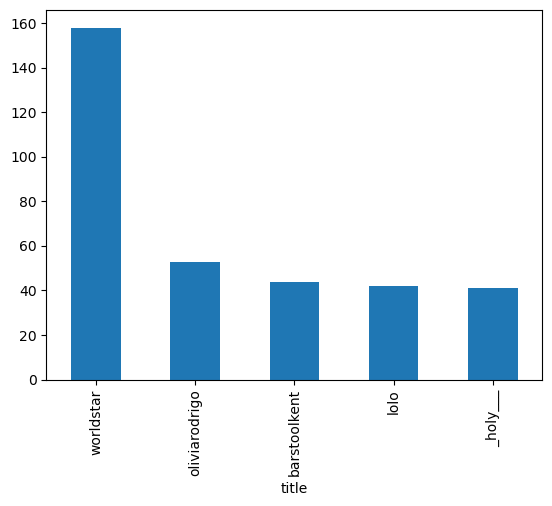

In [10]:
likes_df.groupby('title').count().\
sort_values('timestamp', ascending = False).head()['timestamp'].plot(kind = 'bar')

The advertisers_using_your_activity_or_information.json file contains a list of advertisers that have used my 
activity data for marketing purposes. 

***Hypothesis*** - I believe that a lot of my data is being utilized by marketing companies to target me with ads for business services, 
such as marketing solutions, courses, or coaching, 
based on my activity and interactions on the platform.

***Theoretical Elements*** - Instagram uses personalized advertising by collecting it's users data which can be used to target specific people with ads.  
Marketing companies use this data to create a custom audience and retarget users.  This can lead to me seeing business coaching, 
or ads offering marketing services based on my business related interests.  

***Statistical Elements*** - I would expect to see a higher frequency of ads from marketing companies or business coaches in the data because of my interests. 
With this data a large portion of them should fall into the business or marketing category.  

***Reason for choosing this data*** - It contains advertisers using my data to target me based on my interests.

In [11]:
#Bringing in the path to file
path = r"C:\Users\mmeli\OneDrive\Desktop\advertisers_using_your_activity_or_information.json"
with open(path)as j:
    ads = json.load(j)

In [12]:
ads.keys()

dict_keys(['custom_audiences_all_types_v2'])

In [13]:
ads_df = pd.DataFrame(ads['custom_audiences_all_types_v2'])
ads_df.head(10)

,advertiser_name,has_data_file_custom_audience,has_remarketing_custom_audience,has_in_person_store_visit
0,LiveRamp,True,False,False
1,Broadleaf Marketing & SEO,True,False,False
2,rolling loud,True,False,False
3,KISS Beauty Products,True,False,False
4,INKAS Armored,True,False,False
5,_thevarietystore_,True,False,False
6,"IZEA Worldwide, Inc.",True,False,False
7,National Automobile Dealers Association,True,False,False
8,Beall's Nursery & Landscaping,True,False,False
9,TheKingzletter,True,False,False


***What the DataFrame Represents*** - The DataFrame lists advertisers who have used my instagram data activity for marketing purposes.  It includes columns like advertiser_name and whether they used custom audiences or retarget marketing on me.  

***Tidy Data*** - The data mostly follows tidy data principles, with each advertiser as a row and attributes in their own columns.

***Hypothesis Testing*** - This data can help test my hypothesis by analyzing the advertiser_name column to see how many advertisers are related to marketing or business services which would support my idea that I am being targeted for business related ads.  

***Conclusions based on data analyzed*** - Based on the data analyzed a lot of advertisers on meta are using my information to target me for business
and coaching related ads.  This tells me that my data is being used in these advertisers data sets to personalize ads for me and people with the same
interests.

***Limitations & Potential next Steps*** - The data does not show advertisers who are using custom audiences.  A future analysis could include other
datasets like ad interactions. Also bringing in advertiser data from facebook could help my hypothesis.  